In [1]:
# Import all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import boston housing datasets
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing_df=pd.DataFrame(housing['data'],columns=housing['feature_names'])

In [4]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housing_df['target']=housing['target']

In [6]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
X=housing_df.drop("target",axis=1)
y=housing_df['target']

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [10]:
model.score(X_test,y_test)

0.8065734772187598

In [11]:
y_preds=model.predict(X_test)

In [12]:
y_preds[:5]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [13]:
y_test[:5]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: target, dtype: float64

In [14]:
# Compare predictionst ot the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [15]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

#### Evaluating a machine learning model
    Three ways to evaluate scikit-learn models/estimators
1. Estimator's built in `Score()` method
2. The `scoring` parameter
3. problem specific metric function

In [16]:
# Evaluating a model with the score method

In [17]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

heart_disease=pd.read_csv('heart-disease.csv')
## Create X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

## Create train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Instantiate the model
model=RandomForestClassifier()
## Fit classifier to the model
model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
model.score(X_test,y_test)

0.8524590163934426

#### * Coefficient of determination

In [19]:
X=housing_df.drop("target",axis=1)
y=housing_df['target']
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Training with different estimators

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest =1

model.score(X_test,y_test)

0.8065734772187598

## Evaluating a model using the scoring parameter

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

heart_disease=pd.read_csv('heart-disease.csv')
## Create X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

## Create train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Instantiate the model
model=RandomForestClassifier()
## Fit classifier to the model
model.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
# Normal score using model.score
model.score(X_test,y_test)

0.8524590163934426

In [22]:
# 5 cross validation score
cross_val_score(model,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [23]:
np.random.seed(42)
## Single training and test split score
normal_score=model.score(X_test,y_test)

## Take the mean of 5-fold cross-validation score
clf_cross_validation_score=np.mean(cross_val_score(model,X,y,cv=10))

In [24]:
normal_score,clf_cross_validation_score

(0.8524590163934426, 0.8183870967741935)


## 4.2.1 Classification model evaluation metrics

    1. Accuray
    2. Area under ROC curve
    3. Confusion Matrix
    4. Classification report
**Accuracy**

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

heart_disease=pd.read_csv('heart-disease.csv')
## Create X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

clf=RandomForestClassifier()
cross_score=cross_val_score(clf,X,y,cv=5)

In [5]:
np.mean(cross_score)


0.8248087431693989

In [7]:
print(f"Heart disease classifier cross-validation accuracy: {np.mean(cross_score)*100:.2f}")

Heart disease classifier cross-validation accuracy: 82.48


**Area under the reciever operatimg characterstics curve(AUC/ROC)**
* Area Under Curve(AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false
positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative= model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [10]:
from sklearn.model_selection import train_test_split
# Create x test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.metrics import roc_curve
# Fit the classifier
clf.fit(X_train,y_train)
# Make predictions with probablities
y_proba=clf.predict_proba(X_test)
y_proba[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [14]:
y_probs_positive=y_proba[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [ ]:
# Calculate fpr,tpr,tresholds

In [15]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr[:10]

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552])

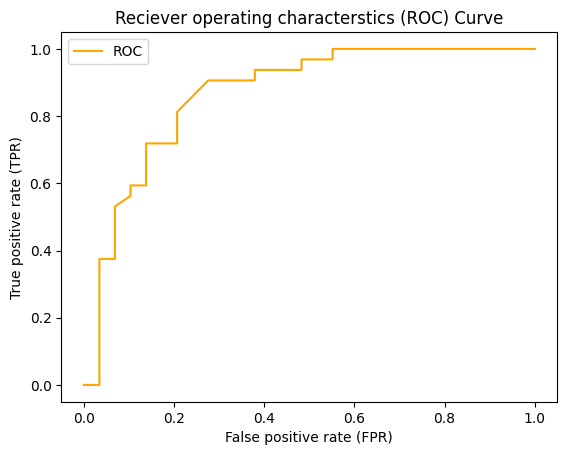

In [16]:
# Create a finction for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the false positive rate (FPR)
    and true positive rate(TPR) of a model
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="Orange",label="ROC")
    
    #Customizing the plot

    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Reciever operating characterstics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)








In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

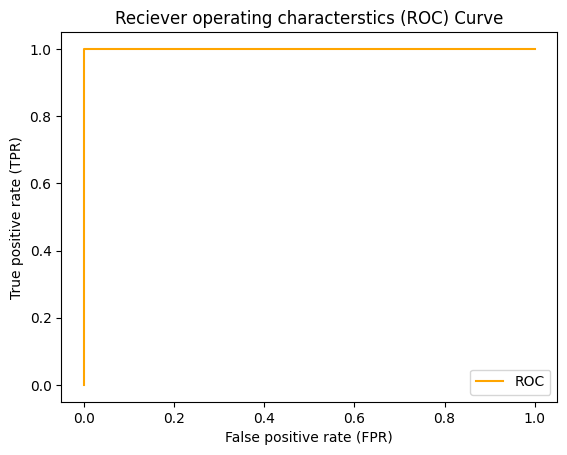

In [18]:
## Perfect ROC Curve
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [19]:
roc_auc_score(y_test,y_test)

1.0

In [20]:
## Confusion matrix

**Confusion Matrix**

A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels 
it was supposed to predict.clear

in essense, giving u an idea of where the model is getting confused

In [21]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [22]:
# Visualization confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [23]:
# Installing seaborn use conda
'''import sys
    !conda install --yes --prefix {sys.prefix} seaborn

'''

'import sys\n    !conda install --yes --prefix {sys.prefix} seaborn\n\n'

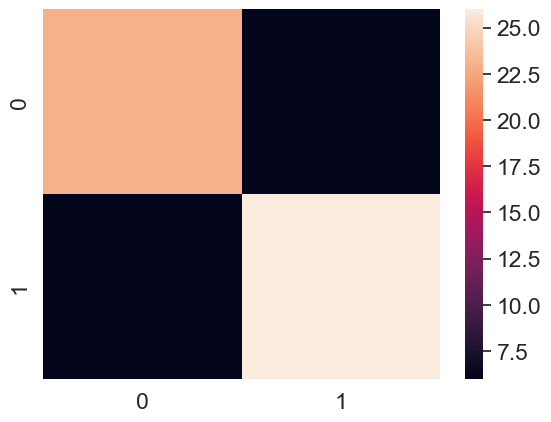

In [24]:
# Make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# Plot using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using sklearn

In [26]:
import sklearn
sklearn.__version__

'1.3.0'

In [27]:
clf

RandomForestClassifier()

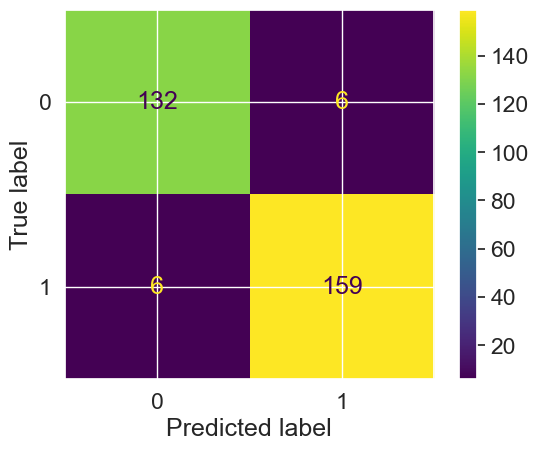

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

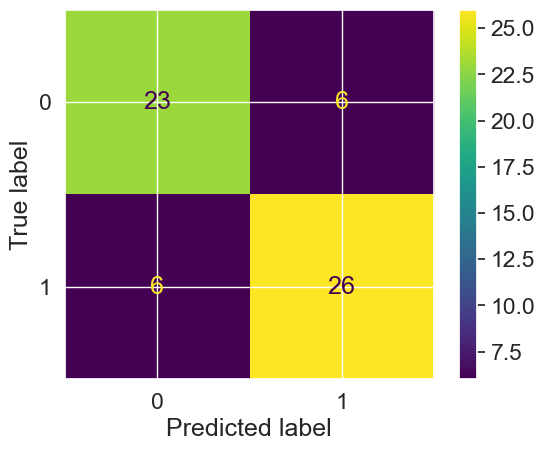

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

## Classification Report

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [31]:
# Where precision and recall become valuable
disease_true=np.zeros(1000)
disease_true[1]=1 # only 1 positive case

disease_preds=np.zeros(1000)

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

c:\Users\USER\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000
